In [ ]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.3 kB/s 
     |████████████████████████████████| 6.6 MB 65.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.1+cu101 which is incompatible.
     |████████████████████████████████| 20.3 MB 86 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uni

     |████████████████████████████████| 269 kB 7.9 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=15e240ecec92833c9593f37368bfc756aedad52045068212284adca111171d5b
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-iugx4dbx
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-iugx4dbx
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265033 sha256=6558c3b5e51d7308f47dc0110a3948d9ec6f1a5c5afe9b918416885370485a20
  Stored in directory: /tmp/pip-ephem-wheel-cache-ub72lssj/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built

In [ ]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex


Cloning into 'apex'...
remote: Enumerating objects: 8102, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 8102 (delta 92), reused 123 (delta 63), pack-reused 7913
Receiving objects: 100% (8102/8102), 14.16 MiB | 26.79 MiB/s, done.
Resolving deltas: 100% (5491/5491), done.
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
User install by explicit request
Created temporary directory: /tmp/pip-ephem-wheel-cache-o69hsofq
Created temporary directory: /tmp/pip-req-tracker-1r63brg6
Initialized build tracking at /tmp/pip-req-tracker-1r63brg6
Created build tracker: /tmp/pip-req-tracker-1r63brg6
Entered build tracker: /tmp/pip-req-tracker-1r63brg6
Created temporar

In [ ]:
from pathlib import Path
import os
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import glob
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
"""%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10"""
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
f = open('/content/labels.json')
labels = json.load(f)
annotations = []
for key, val in labels.items():
  img = {}
  img['name'] = key
  img['annotation'] = val
  annotations.append(img)
"""with open("/content/drive/My Drive/labels.json") as f:
    for line in f:
        labels.append(json.loads(line))"""

'with open("/content/drive/My Drive/labels.json") as f:\n    for line in f:\n        labels.append(json.loads(line))'

In [ ]:
annotations[0]

{'annotation': [{'geometry': [[95, 54], [128, 67]],
   'type': 'text',
   'value': '5JS1r'},
  {'geometry': [[95, 98], [158, 109]], 'type': 'text', 'value': 'L66xhkx'},
  {'geometry': [[95, 143], [141, 157]], 'type': 'text', 'value': '9Gy0e'},
  {'geometry': [[95, 189], [126, 199]], 'type': 'text', 'value': 'E77t'},
  {'geometry': [[95, 234], [121, 244]], 'type': 'text', 'value': '5C6'},
  {'geometry': [[95, 278], [148, 290]], 'type': 'text', 'value': 'HYXR8'},
  {'geometry': [[94, 323], [132, 338]], 'type': 'text', 'value': '42dq'},
  {'geometry': [[95, 369], [126, 382]], 'type': 'text', 'value': 'E0Jc'},
  {'geometry': [[95, 413], [146, 424]], 'type': 'text', 'value': '2C6ol5'},
  {'geometry': [[95, 459], [150, 473]], 'type': 'text', 'value': 'I4KCCg'},
  {'geometry': [[245, 53], [281, 65]], 'type': 'text', 'value': 'SZG1'},
  {'geometry': [[326, 53], [365, 65]], 'type': 'text', 'value': 'ZF511'},
  {'geometry': [[245, 98], [313, 110]], 'type': 'text', 'value': 'IGZC4wx'},
  {'geomet

In [ ]:
categories = ['text', 'bar_code', 'qr_code']
len(annotations)

1000

In [ ]:
train_set, val_set = train_test_split(annotations, test_size=0.1)
len(train_set), len(val_set)

(900, 100)

BZ6ZX0hy0zwaa
(1024, 800, 3)


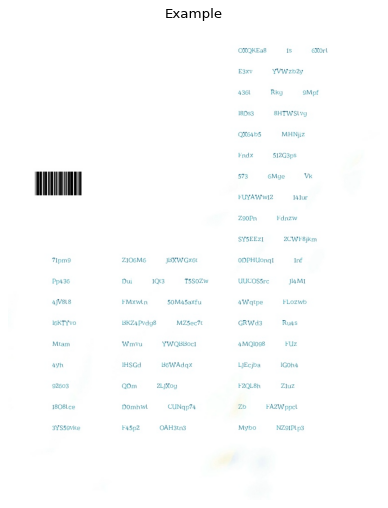

In [ ]:
row = train_set[1]
print(Path(row['name']).stem) 
example = cv2.imread('/content/samples/' + row['name'])
print(example.shape)
plt.figure(figsize=(6,10), dpi=80)
plt.imshow(example)
plt.title('Example')
plt.axis('off')
plt.show()

In [ ]:
for a in row['annotation']:
    points = a['geometry']
    p1, p2 = points
    x_min, y_min = p1[0], p1[1]
    x_max, y_max = p2[0], p2[1]
    cv2.rectangle(
      example,
      (int(x_min), int(y_min)),
      (int(x_max), int(y_max)),
      color=(0, 255, 0),
      thickness=2
    )

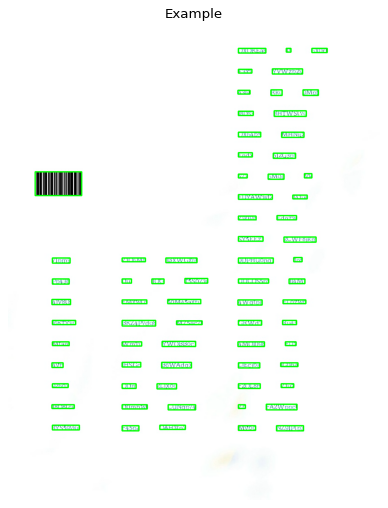

In [ ]:
plt.figure(figsize=(6,10), dpi=80)
plt.imshow(example)
plt.title('Example')
plt.axis('off')
plt.show()

In [ ]:
def create_dataset(annotations, categories, dataset_type, parent_path):
  images_path = Path(f"{parent_path}/images/{dataset_type}")
  images_path.mkdir(parents=True, exist_ok=True)
  labels_path = Path(f"{parent_path}/labels/{dataset_type}")
  labels_path.mkdir(parents=True, exist_ok=True)
  for row in tqdm(annotations):
    img_path = Path(f"{parent_path}/samples/{row['name']}")
    img = Image.open(img_path)
    h = np.array(img).shape[0]
    w = np.array(img).shape[1]
    img.save(str(images_path / row['name']), "JPEG")
    label_name = Path(row['name']).stem + ".txt"
    #print(label_name)
    with (labels_path / label_name).open(mode="w") as label_file:
      for a in row['annotation']:
          category_idx = categories.index(a['type'])
          points = a['geometry']
          p1, p2 = points
          x_min, y_min = p1[0], p1[1]
          x_max, y_max = p2[0], p2[1]
          bbox_width = (x_max - x_min)/w
          bbox_height = (y_max - y_min)/h
          label_file.write(
            f"{category_idx} {x_min/w + bbox_width / 2} {y_min/h + bbox_height / 2} {bbox_width} {bbox_height}\n"
          )

In [ ]:
parent_path = '/content'
create_dataset(train_set, categories, 'train', parent_path)
create_dataset(val_set, categories, 'val', parent_path)

100%|██████████| 100/100 [00:03<00:00, 32.88it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

Cloning into 'yolov5'...
remote: Enumerating objects: 8447, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 8447 (delta 75), reused 94 (delta 45), pack-reused 8286
Receiving objects: 100% (8447/8447), 9.57 MiB | 1.22 MiB/s, done.
Resolving deltas: 100% (5817/5817), done.
/content/yolov5
Note: checking out 'ec72eea62bf5bb86b0272f2e65e413957533507f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ec72eea Merge remote-tracking branch 'origin/master'


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!gdown --id 1GDg4h7l2TTD8E_26Co5-uca75Pcf41a_ -O data/conf.yaml
!gdown --id 1U6P2KlQDIzZeuP7_jPVxSQeZ81ZVs8nk -O models/yolov5x.yaml
#!gdown --id 1QEp9wFIuib8AJCcwwzJmDSRRogN8KcXx -O weights/yolov5x.pt 

Downloading...
From: https://drive.google.com/uc?id=1GDg4h7l2TTD8E_26Co5-uca75Pcf41a_
To: /content/yolov5/data/conf.yaml
100% 103/103 [00:00<00:00, 48.5kB/s]
Downloading...
From: https://drive.google.com/uc?id=1U6P2KlQDIzZeuP7_jPVxSQeZ81ZVs8nk
To: /content/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 2.52MB/s]


In [ ]:
!python train.py --img 640 --batch 8 --epochs 20 \
  --data ./data/conf.yaml --cfg ./models/yolov5x.yaml --weights '' \
  --name yolov5x_exo2 --cache

Traceback (most recent call last):
  File "train.py", line 3, in <module>
    import torch.distributed as dist
  File "/usr/local/lib/python3.7/dist-packages/torch/__init__.py", line 365, in <module>
    import torch.hub
  File "/usr/local/lib/python3.7/dist-packages/torch/hub.py", line 436, in <module>
    def _download_url_to_file(url, dst, hash_prefix=None, progress=True):
KeyboardInterrupt


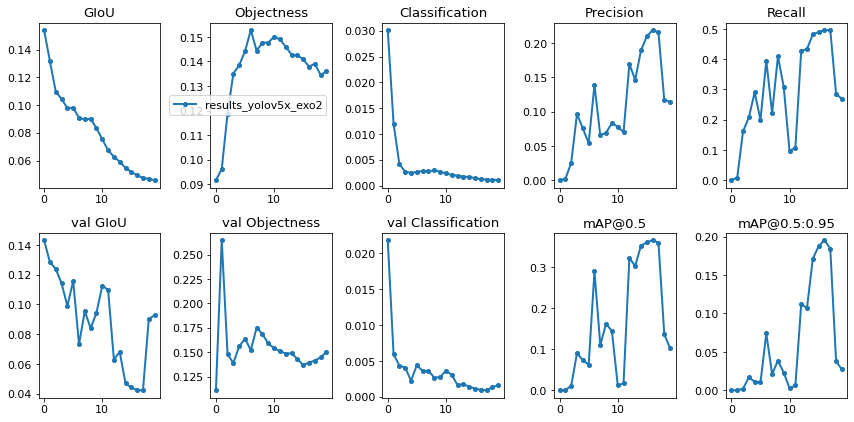

In [ ]:
from utils.utils import plot_results
plot_results();

In [ ]:

%cd /content
if not os.path.exists('inference'):
        os.makedirs('inference')


/content


In [ ]:
!find ./images/val -maxdepth 1 -type f | head -50 | xargs cp -t "./inference"

In [ ]:
!python ./yolov5/detect.py --weights ./yolov5/weights/best_yolov5x_exo2.pt \
  --img 640 --conf 0.4 --source ./inference/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/', view_img=False, weights='./yolov5/weights/best_yolov5x_exo2.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

image 1/50 inference/0775K8Bfxdgmt.jpg: 640x512 79 texts, 3 bar_codes, Done. (0.046s)
image 2/50 inference/0LA59O0e5ag0mj.jpg: 640x512 79 texts, Done. (0.044s)
image 3/50 inference/4FK21Oit4lm2e.jpg: 640x512 77 texts, 2 bar_codes, Done. (0.039s)
image 4/50 inference/57WZF66fmd38c.jpg: 640x512 81 texts, 1 qr_codes, Done. (0.039s)
image 5/50 inference/6B9DK31djf7wf.jpg: 640x512 113 texts, Done. (0.036s)
image 6/50 inference/79RQUY4mk6oj7w.jpg: 640x512 87 texts, 1 bar_codes, Done. (0.033s)
image 7/50 inference/7WBB6Xrvtmjb.jpg: 640x512 89 texts, 1 bar_codes, Done. (0.033s)
image 8/50 inference/A1YDN1Sfsvc564.jpg: 640x512 83 texts, 1 qr_codes, Done. (0.0

In [ ]:
def load_image(img_path: Path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
  return img
def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  print(images.shape)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=11)
  plt.figure(figsize=(24, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

[]
torch.Size([22, 256, 128, 3])


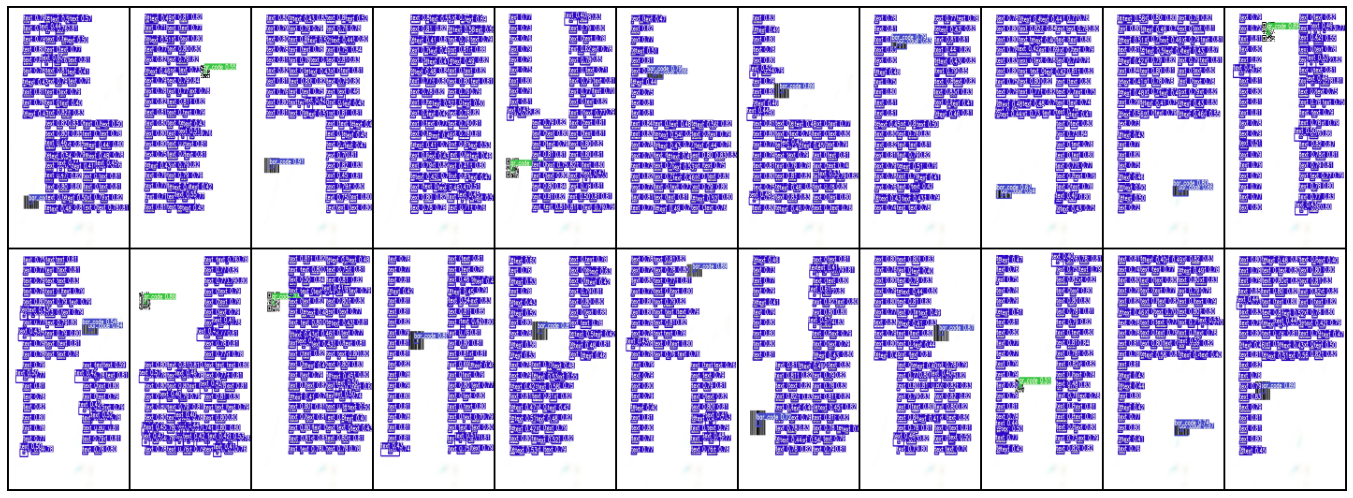

In [ ]:

img_paths = list(Path("./inference/output").glob("*.jpg"))[:22]
print(files)
show_grid(img_paths)